# Eye vs. Nose

Ejemplo básico de CNN en la que se reconocen imágenes de 32x32 pixeles que contienen una nariz o un ojo (de la base de datos AR). Este es quizás uno de los ejemplos más simples para entrenar una CNN ya que la diferencia existente entre las clases es enorme, y su entrenamiento es muy rápido y efectivo. Se presenta sólo con fines pedagógicos. Se recomienda entender y probar esta red antes probar problemas de mayor complejidad.

In [1]:
!wget https://www.dropbox.com/s/axi1waqeafu76rj/eyenose.zip?dl=0
!unzip -qq eyenose.zip 

--2022-10-29 11:59:46--  https://www.dropbox.com/s/nfp7py0310zajeu/eyenose.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nfp7py0310zajeu/eyenose.zip [following]
--2022-10-29 11:59:47--  https://www.dropbox.com/s/raw/nfp7py0310zajeu/eyenose.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc356fabcbb2edb33c3c55f1bbc6.dl.dropboxusercontent.com/cd/0/inline/Bvs3k-yZNC6B7owx2PclMczfm1L-f-v3yo5CYzYN3291TSWugYBoZquT1iABDYeDnp_cus1M4_ev5Hl7WkOBZctj-b_trXMK3qOSSedOLR7mBLfYAKa26yUsBsUwWkK2AP9W4DEr669T1vuTAUJgDIQ1FbZGjcvr2-ES_M6hWVMJ5g/file# [following]
--2022-10-29 11:59:47--  https://uc356fabcbb2edb33c3c55f1bbc6.dl.dropboxusercontent.com/cd/0/inline/Bvs3k-yZNC6B7owx2PclMczfm1L-f-v3yo5CYzYN3291TSWugYBoZquT1iABDYeDnp_cus1M4_ev5Hl7W

In [2]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "eyenose/train"
test_dir  = "eyenose/test"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 32, 32])
   Classes:  ['eye', 'nose']


In [3]:
!wget https://www.dropbox.com/s/enxeo732bat5tr9/cnn_utils_01.py?dl=0
from cnn_utils_01 import display_img,show_batch,plot_accuracies,plot_losses,print_confusion
from cnn_utils_01 import fit,ImageClassificationBase,nn
from cnn_utils_01 import load_model,get_labels,get_prediction,performance
print('cnn_utils module has been loaded')

cnn_utils module has been loaded


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Image: 155, Label : eye


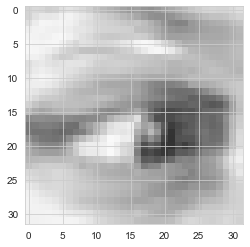

In [4]:
#display an image in the training dataset
display_img(train_set,155)

In [5]:
batch_size = 40
val_size   = 960 
train_size = len(train_set) - val_size 

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data      : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_data, 2*batch_size, num_workers = 2, pin_memory = True)

Length of Train Data      : 7360
Length of Validation Data : 960


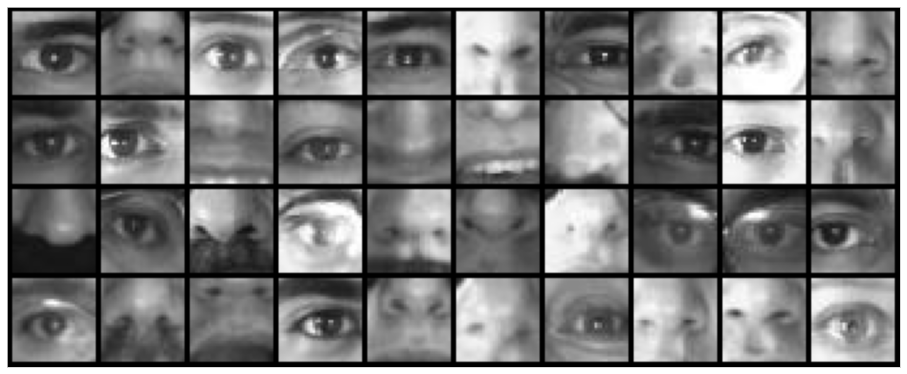

In [6]:
show_batch(train_dl,nrow=10)

In [7]:
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 6, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Flatten(),
            nn.Linear(32,2)
        )
    
    def forward(self, xb):
        return self.network(xb)


In [8]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(6, 6))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [9]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         =  0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.3212      0.1590      0.9469    ***      29.0 
    1      0.1150      0.1188      0.9604    ***       8.3 
    2      0.0937      0.0776      0.9771    ***       8.2 
    3      0.0654      0.0381      0.9896    ***       8.1 
    4      0.0363      0.0372      0.9875              8.1 
    5      0.0345      0.0297      0.9875              8.9 
    6      0.0258      0.0244      0.9938    ***       8.2 
    7      0.0217      0.0247      0.9906              8.1 
    8      0.0321      0.0235      0.9917              8.0 
    9      0.0272      0.0244      0.9896              8.0 
   10      0.0245      0.0157      0.9938              8.3 
   11      0.0184      0.0441      0.9813              7.9 
   12      0.0192      0.0273      0.9906              7.8 
   13      0.0180      0.0292      0.9917              8.3 
   14      0.0259      0.0268 

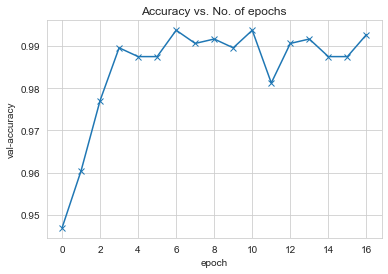

In [10]:
plot_accuracies(history)

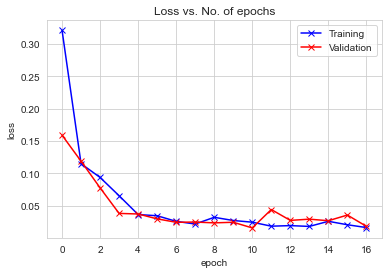

In [11]:
plot_losses(history)

In [12]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [13]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred) 
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.9889423076923077
 
Confusion Matrix = 
[[1019   21]
 [   2 1038]]


Confusion Matrix:
[[1019   21]
 [   2 1038]]
Accuracy = 98.89


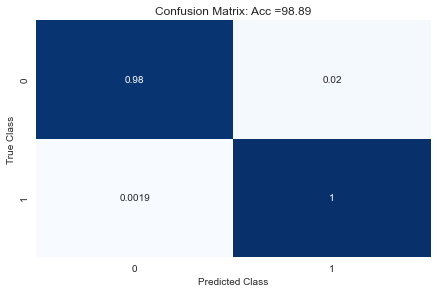

In [14]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [15]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data  ,'Validation')
C3,acc3 = performance(model,test_set  ,'Testing')

Training Confusion Matrix = 
[[3650   20]
 [  13 3677]]
 
Training Accuracy = 0.9955
 
Validation Confusion Matrix = 
[[488   2]
 [  4 466]]
 
Validation Accuracy = 0.9938
 
Testing Confusion Matrix = 
[[1019   21]
 [   2 1038]]
 
Testing Accuracy = 0.9889
 
